Source:https://archive.ics.uci.edu/dataset/352/online+retail

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
! unzip -o /content/online+retail.zip


Archive:  /content/online+retail.zip
 extracting: Online Retail.xlsx      


In [7]:
path = "/content/Online Retail.xlsx"
df = pd.read_excel(path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
file_path = "/content/Online Retail.xlsx"

df = pd.read_excel(path)

# Calculate the total number of items sold
total_quantity_sold = df['Quantity'].sum()

# Calculate total sales amount
total_sales_amount = (df['Quantity'] * df['UnitPrice']).sum()

# Calculate the average price per unit of an item
average_price_per_unit = df['UnitPrice'].mean()

print(f"Total number of items sold: {total_quantity_sold}")
print(f"Total sales: {total_sales_amount}")
print(f"Average price per unit: {average_price_per_unit}")

Total number of items sold: 5176450
Total sales: 9747747.933999998
Average price per unit: 4.611113626088513


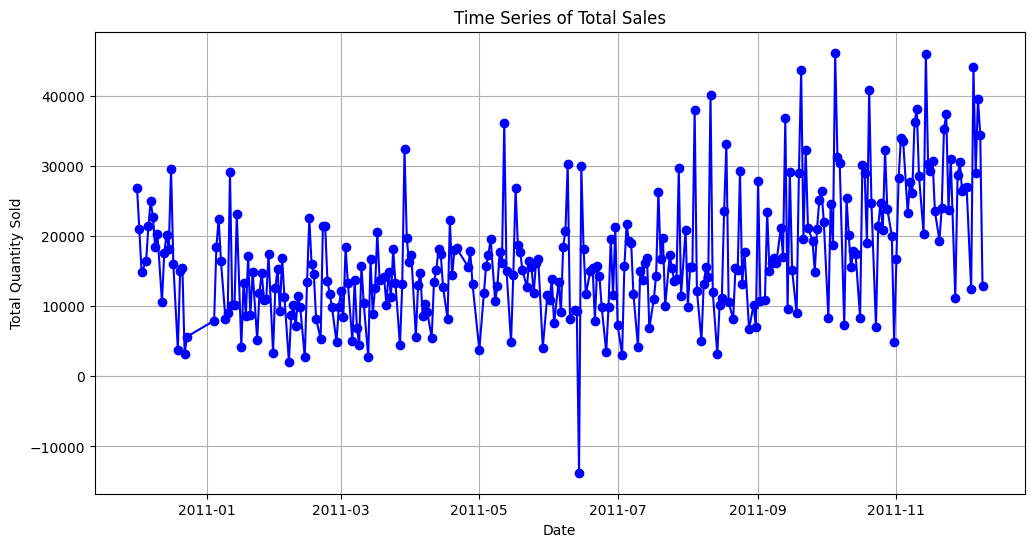

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a time series for total sales
time_series = df.groupby(df['InvoiceDate'].dt.date)['Quantity'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values, marker='o', linestyle='-', color='b')
plt.title('Time Series of Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()


10 products by number of units sold:


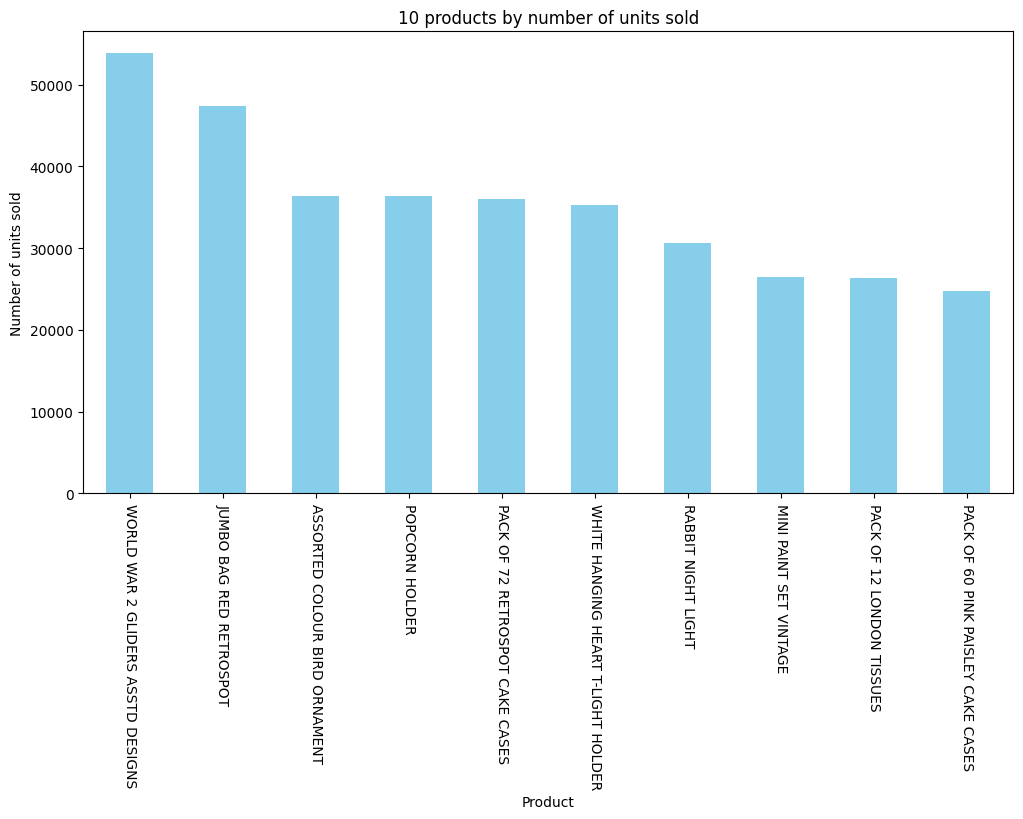

In [30]:
product_performance = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

top_products = product_performance.head(10)
print("10 products by number of units sold:")
top_products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('10 products by number of units sold')
plt.xlabel('Product')
plt.ylabel('Number of units sold')
plt.xticks(rotation=270)
plt.show()

Top 10 countries by number of units sold:
Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64


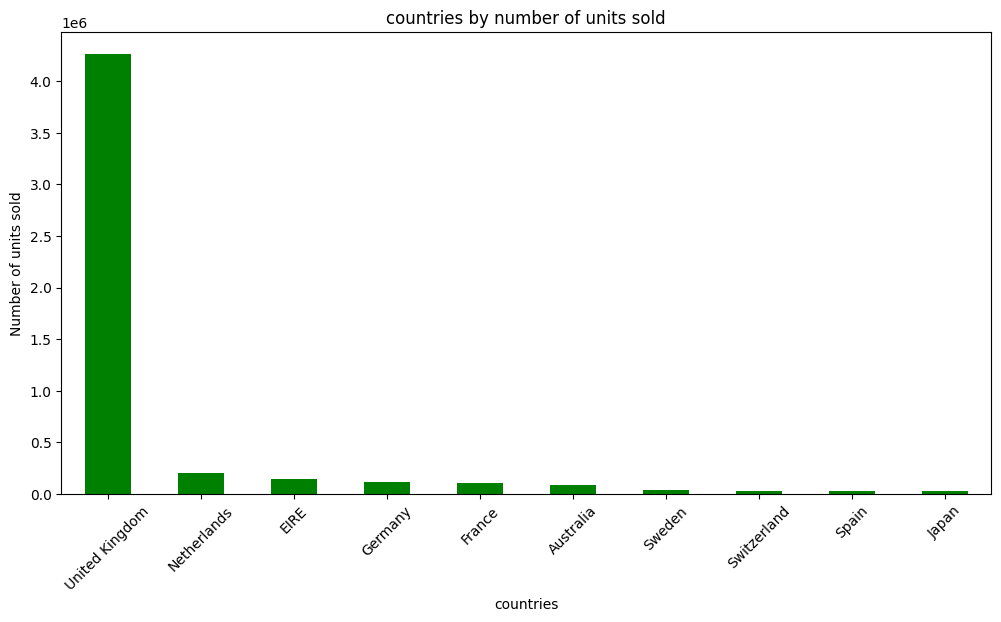

In [34]:
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

top_countries = sales_by_country.head(10)
print("Top 10 countries by number of units sold:")
print(top_countries)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='green')
plt.title('countries by number of units sold')
plt.xlabel('countries')
plt.ylabel('Number of units sold')
plt.xticks(rotation=45)
plt.show()

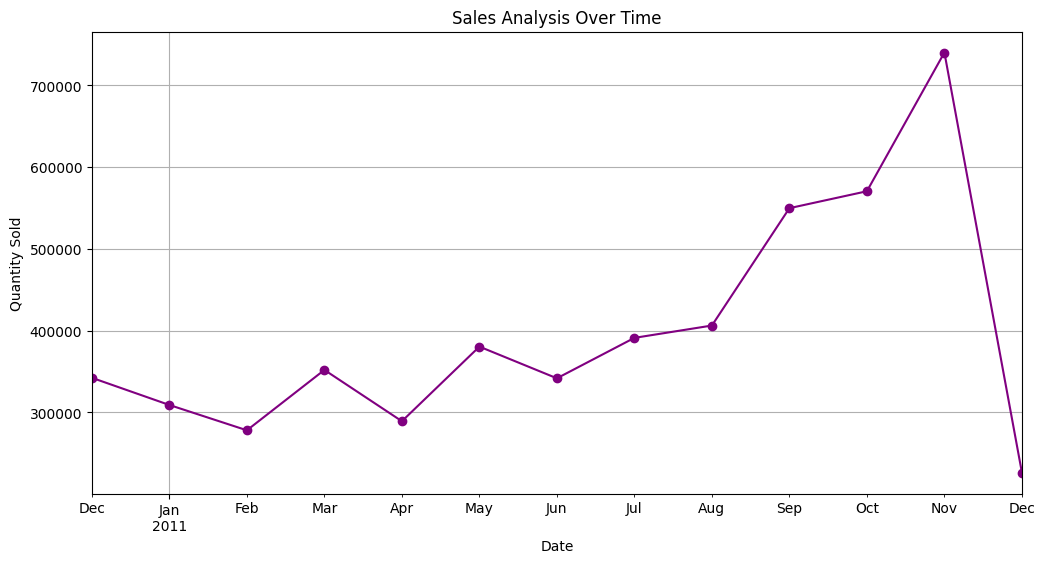

In [37]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a time series to analyze sales over time

sales_by_time = df.set_index('InvoiceDate')['Quantity'].resample('M').sum()

plt.figure(figsize=(12, 6))
sales_by_time.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Sales Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

We found out that Unighted Kingdom lands on top of "countries by number of units sold" plot and we can see that at November amount of sales decreasing , probbly if we depend of political situation in UK we can possibly make conclusion that because of this UK citizens stoped buying items
30 November – Public sector workers stage a strike over government plans to make their members pay more and work longer to earn their pensions.
source : "Pensions strike: Unite and probation unions join action"
https://www.bbc.com/news/business-15777398